## Instalamos Paquetes

In [1]:
#Limpiamos memoria
rm(list=ls());
is.installed <- function(mypkg) {
  is.element(mypkg, installed.packages()[,1]) 
}

#Instalamos paquetes para agrupar csv
if (!is.installed("data.table")){
  install.packages("data.table",repos = "http://cran.us.r-project.org")
};
#Intslamos paquete para manipular ts
if (!is.installed("xts")){
  install.packages("xts",repos = "http://cran.us.r-project.org")
};
#Instalamos paquete para agrupar datos
if (!is.installed("dplyr")){
  install.packages("dplyr",repos = "http://cran.us.r-project.org")
};

# Instalamos paquete para leer exccels
if (!is.installed("readxl")){
  install.packages("readxl",repos = "http://cran.us.r-project.org")
};


# Cargamos las librerias
library(data.table)
library(xts)
library(dplyr)    # loads %>%
library(readxl)

also installing the dependencies ‘curl’, ‘httr’, ‘rvest’

Warning message in install.packages("tidyverse", repos = "http://cran.us.r-project.org"):
“installation of package ‘curl’ had non-zero exit status”Warning message in install.packages("tidyverse", repos = "http://cran.us.r-project.org"):
“installation of package ‘httr’ had non-zero exit status”Warning message in install.packages("tidyverse", repos = "http://cran.us.r-project.org"):
“installation of package ‘rvest’ had non-zero exit status”Warning message in install.packages("tidyverse", repos = "http://cran.us.r-project.org"):
“installation of package ‘tidyverse’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Attaching package: ‘xts’

The following objects are masked from ‘package:data.table’:

    first, last


Attaching package: ‘dp

## Carga Datos Calidad del aire 2001-2018

In [2]:
#Cargamos los datos de los anos en un dataset (utilziamos read.csv ya que el separador es,)
data2001<- read.csv(file = "data/madrid_2001.csv",header = TRUE);
data2002<- read.csv(file = "data/madrid_2002.csv",header = TRUE);
data2003<- read.csv(file = "data/madrid_2003.csv",header = TRUE);
data2004<- read.csv(file = "data/madrid_2004.csv",header = TRUE);
data2005<- read.csv(file = "data/madrid_2005.csv",header = TRUE);
data2006<- read.csv(file = "data/madrid_2006.csv",header = TRUE);
data2007<- read.csv(file = "data/madrid_2007.csv",header = TRUE);
data2008<- read.csv(file = "data/madrid_2008.csv",header = TRUE);
data2009<- read.csv(file = "data/madrid_2009.csv",header = TRUE);
data2010<- read.csv(file = "data/madrid_2010.csv",header = TRUE);
data2011<- read.csv(file = "data/madrid_2011.csv",header = TRUE);
data2012<- read.csv(file = "data/madrid_2012.csv",header = TRUE);
data2013<- read.csv(file = "data/madrid_2013.csv",header = TRUE);
data2014<- read.csv(file = "data/madrid_2014.csv",header = TRUE);
data2015<- read.csv(file = "data/madrid_2015.csv",header = TRUE);
data2016<- read.csv(file = "data/madrid_2016.csv",header = TRUE);
data2017<- read.csv(file = "data/madrid_2017.csv",header = TRUE);
data2018<- read.csv(file = "data/madrid_2018.csv",header = TRUE);

In [3]:
#unimos los datos en una lista para luego introducirla en un dataset
data <- data.table::rbindlist(list(data2001,data2002,data2003,data2004,data2005,data2006,data2007,data2008,data2009,data2010,data2011,data2012,
data2013,data2014,data2015,data2016,data2017,data2018), fill = TRUE);
datasetMadrid <- as.data.frame(data); 

In [4]:
##observamos que todos los datos se han unido, aplicando head y tail al dataset para ver cuando empiezan y acaban fechas
head(datasetMadrid)

date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
2001-08-01 01:00:00,NA,0.37,NA,NA,NA,58.40,87.15,NA,34.53,105.00,NA,6.34,NA,NA,28079001,NA,NA,NA
2001-08-01 01:00:00,1.50,0.34,1.49,4.10,0.07,56.25,75.17,2.11,42.16,100.60,1.73,8.11,1.24,10.82,28079035,NA,NA,NA
2001-08-01 01:00:00,NA,0.28,NA,NA,NA,50.66,61.38,NA,46.31,100.10,NA,7.85,NA,NA,28079003,NA,NA,NA
2001-08-01 01:00:00,NA,0.47,NA,NA,NA,69.79,73.45,NA,40.65,69.78,NA,6.46,NA,NA,28079004,NA,NA,NA
2001-08-01 01:00:00,NA,0.39,NA,NA,NA,22.83,24.80,NA,66.31,75.18,NA,8.80,NA,NA,28079039,NA,NA,NA
2001-08-01 01:00:00,2.11,0.63,2.48,5.94,0.05,66.26,118.10,3.15,33.50,122.70,2.29,6.36,1.23,13.28,28079006,NA,NA,NA


In [5]:
tail(datasetMadrid)

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
3808219,2018-02-01 00:00:00,1.3,NA,1.2,NA,0.13,94,190,NA,NA,35,NA,NA,1.68,5.2,28079055,NA,63,1.55
3808220,2018-02-01 00:00:00,NA,0.5,NA,NA,NA,91,192,NA,1,35,NA,NA,NA,NA,28079056,22,66,NA
3808221,2018-02-01 00:00:00,NA,0.7,NA,NA,NA,107,241,NA,NA,29,NA,15,NA,NA,28079057,NA,87,NA
3808222,2018-02-01 00:00:00,NA,NA,NA,NA,NA,48,91,NA,2,NA,NA,NA,NA,NA,28079058,NA,28,NA
3808223,2018-02-01 00:00:00,NA,NA,NA,NA,NA,103,320,NA,2,NA,NA,NA,NA,NA,28079059,NA,141,NA
3808224,2018-02-01 00:00:00,NA,NA,NA,NA,NA,96,202,NA,3,26,NA,NA,NA,NA,28079060,NA,69,NA


## Carga Datos Precipitaciones 2001-2018

In [6]:
#Cargamos los datos de las precipitaciones
rainfall_2001<- readxl::read_xlsx("data/rainfall_2001.xlsx",col_names = TRUE);
rainfall_2002<- readxl::read_xlsx("data/rainfall_2002.xlsx",col_names = TRUE);
rainfall_2003<- readxl::read_xlsx("data/rainfall_2003.xlsx",col_names = TRUE);
rainfall_2004<- readxl::read_xlsx("data/rainfall_2004.xlsx",col_names = TRUE);
rainfall_2005<- readxl::read_xlsx("data/rainfall_2005.xlsx",col_names = TRUE);
rainfall_2006<- readxl::read_xlsx("data/rainfall_2006.xlsx",col_names = TRUE);
rainfall_2007<- readxl::read_xlsx("data/rainfall_2007.xlsx",col_names = TRUE);
rainfall_2008<- readxl::read_xlsx("data/rainfall_2008.xlsx",col_names = TRUE);
rainfall_2009<- readxl::read_xlsx("data/rainfall_2009.xlsx",col_names = TRUE);
rainfall_2010<- readxl::read_xlsx("data/rainfall_2010.xlsx",col_names = TRUE);
rainfall_2011<- readxl::read_xlsx("data/rainfall_2011.xlsx",col_names = TRUE);
rainfall_2012<- readxl::read_xlsx("data/rainfall_2012.xlsx",col_names = TRUE);
rainfall_2013<- readxl::read_xlsx("data/rainfall_2013.xlsx",col_names = TRUE);
rainfall_2014<- readxl::read_xlsx("data/rainfall_2014.xlsx",col_names = TRUE);
rainfall_2015<- readxl::read_xlsx("data/rainfall_2015.xlsx",col_names = TRUE);
rainfall_2016<- readxl::read_xlsx("data/rainfall_2016.xlsx",col_names = TRUE);
rainfall_2017<- readxl::read_xlsx("data/rainfall_2017.xlsx",col_names = TRUE);
rainfall_2018<- readxl::read_xlsx("data/rainfall_2018.xlsx",col_names = TRUE);

In [7]:
rainfall <- data.table::rbindlist(list(rainfall_2001,rainfall_2002,rainfall_2003,rainfall_2004,
              rainfall_2005,rainfall_2006,rainfall_2007,rainfall_2008,rainfall_2009,rainfall_2010,
              rainfall_2011,rainfall_2012,rainfall_2013,rainfall_2014,rainfall_2015,rainfall_2016,
rainfall_2017,rainfall_2018), fill = TRUE)
datasetRainfall <- as.data.frame(rainfall);
data.table::setnames(datasetRainfall, "FECHA", "date")
data.table::setnames(datasetRainfall, "Precipitación: l/m2", "l/m2")

In [8]:
##observamos que todos los datos se han unido, aplicando head y tail al dataset para ver cuando empiezan y acaban fechas
head(datasetRainfall)

date,l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0


In [9]:
tail(datasetRainfall)

,date,l/m2
5933,2018-12-26,0
5934,2018-12-27,0
5935,2018-12-28,0
5936,2018-12-29,0
5937,2018-12-30,0
5938,2018-12-31,0


In [10]:
#Liberamos memoria de los datos 
rm(list=ls(pat="20"))
rm(data)

## Limpieza de datos

In [11]:
#Limpieza de datos datasetMadrid
#1) Calculamos el porcenje de NA para descartar aquellas columnas cuyo porcentage sea muy alto
naPerColumn <- colSums(is.na(datasetMadrid))
#2) Todos los gases tienen al menos un NA por , tanto, estudiamos gases a descartar, para ello
#quitamos los demás parámetros
percentageNA <- naPerColumn/nrow(datasetMadrid) *100
percentageNA <- percentageNA[percentageNA > 0]
percentageNA

BEN         CO        EBE        MXY       NMHC       NO_2        NOx 
72.6464620 30.3871831 73.6957700 91.7175303 71.5008361  0.5560072 37.6014909 
       OXY        O_3       PM10        PXY       SO_2        TCH        TOL 
91.7101778 21.4402304 24.8664207 91.7130925 27.1061786 71.4711897 72.7188054 
      PM25         NO        CH4 
78.5615552 59.7608492 99.6100545

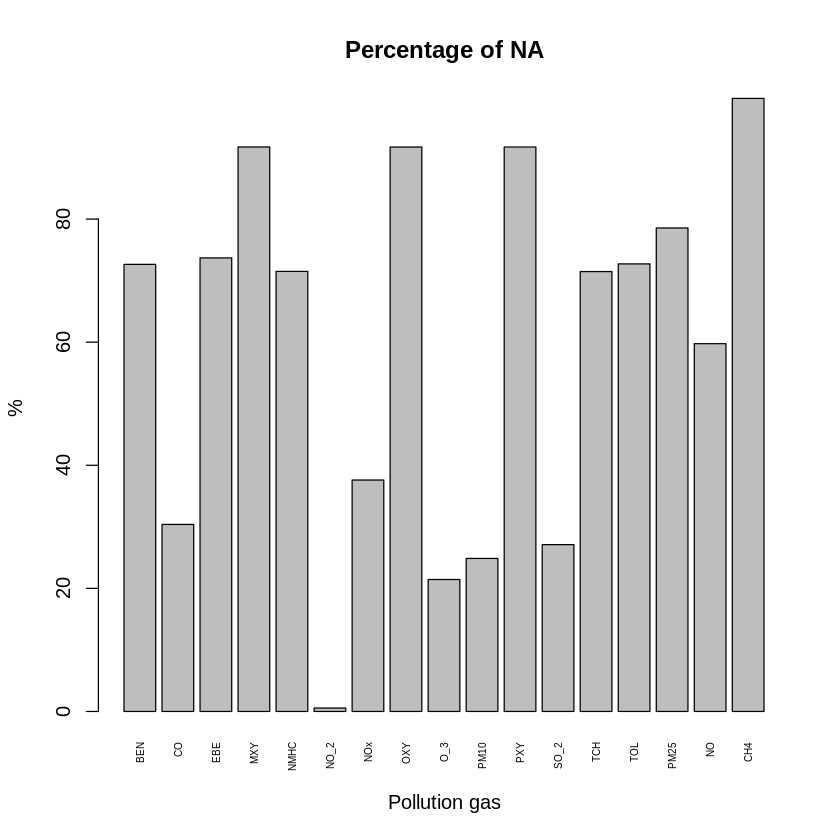

In [12]:
#2)Pintamos grafica de barras para observar volumen NA en los gases contaminantes
barplot(percentageNA, main ="Percentage of NA",xlab = "Pollution gas",ylab = "%", las=3, cex.names=.5)

In [13]:
#Nos quedamos con aquellos gases que tengan menos del 35% de NA
percentageNA[percentageNA < 35]

CO       NO_2        O_3       PM10       SO_2 
30,3871831  0,5560072 21,4402304 24,8664207 27,1061786

In [14]:
#Procedemos a quitar el resto de columnas
datasetMadrid$BEN = NULL;
datasetMadrid$EBE = NULL;
datasetMadrid$MXY = NULL;
datasetMadrid$NMHC = NULL;
datasetMadrid$NOx = NULL;
datasetMadrid$OXY = NULL;
datasetMadrid$PXY = NULL;
datasetMadrid$TCH = NULL;
datasetMadrid$TOL = NULL;
datasetMadrid$PM25 = NULL;
datasetMadrid$NO = NULL;
datasetMadrid$CH4 = NULL;
#Mostramos dataframe para observar cambios
head(datasetMadrid)
tail(datasetMadrid)

date,CO,NO_2,O_3,PM10,SO_2,station
2001-08-01 01:00:00,"0,37","58,40","34,53","105,00","6,34",28079001
2001-08-01 01:00:00,"0,34","56,25","42,16","100,60","8,11",28079035
2001-08-01 01:00:00,"0,28","50,66","46,31","100,10","7,85",28079003
2001-08-01 01:00:00,"0,47","69,79","40,65","69,78","6,46",28079004
2001-08-01 01:00:00,"0,39","22,83","66,31","75,18","8,80",28079039
2001-08-01 01:00:00,"0,63","66,26","33,50","122,70","6,36",28079006


,date,CO,NO_2,O_3,PM10,SO_2,station
3808219,2018-02-01 00:00:00,NA,94,NA,35,NA,28079055
3808220,2018-02-01 00:00:00,"0,5",91,1,35,NA,28079056
3808221,2018-02-01 00:00:00,"0,7",107,NA,29,15,28079057
3808222,2018-02-01 00:00:00,NA,48,2,NA,NA,28079058
3808223,2018-02-01 00:00:00,NA,103,2,NA,NA,28079059
3808224,2018-02-01 00:00:00,NA,96,3,26,NA,28079060


## Agrupacion de datos
Se ordenan los datos por estacion, después de ellos se comprimen todas las horas de un dia de la estación, en un dia

In [15]:
datasetMadrid<- datasetMadrid[order(datasetMadrid$date),]
head(datasetMadrid)
tail(datasetMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
108361,2001-01-01 01:00:00,"0,93","54,08","5,89","23,23","12,73",28079035
108362,2001-01-01 01:00:00,"0,92","60,25","5,75","50,74","39,12",28079003
108363,2001-01-01 01:00:00,"1,05","50,24","5,98","19,65","20,61",28079004
108364,2001-01-01 01:00:00,"0,74","49,41","2,49","36,82","9,60",28079039
108365,2001-01-01 01:00:00,"1,59","58,40","6,77","25,67","40,22",28079006
108366,2001-01-01 01:00:00,"0,91","46,47","10,14","22,42","41,77",28079007


,date,CO,NO_2,O_3,PM10,SO_2,station
3774235,2018-05-01 00:00:00,NA,32,NA,6,NA,28079055
3774236,2018-05-01 00:00:00,"0,2",34,53,1,NA,28079056
3774237,2018-05-01 00:00:00,"0,3",13,NA,4,9,28079057
3774238,2018-05-01 00:00:00,NA,3,76,NA,NA,28079058
3774239,2018-05-01 00:00:00,NA,19,65,NA,NA,28079059
3774240,2018-05-01 00:00:00,NA,14,81,6,NA,28079060


In [16]:
datasetMadrid$date <- as.POSIXct(datasetMadrid$date, format = "%Y-%m-%d %H:%M:%S")
datasetMadrid$date <- format(datasetMadrid$date, "%Y-%m-%d")
head(datasetMadrid)
tail(datasetMadrid)

,date,CO,NO_2,O_3,PM10,SO_2,station
108361,2001-01-01,"0,93","54,08","5,89","23,23","12,73",28079035
108362,2001-01-01,"0,92","60,25","5,75","50,74","39,12",28079003
108363,2001-01-01,"1,05","50,24","5,98","19,65","20,61",28079004
108364,2001-01-01,"0,74","49,41","2,49","36,82","9,60",28079039
108365,2001-01-01,"1,59","58,40","6,77","25,67","40,22",28079006
108366,2001-01-01,"0,91","46,47","10,14","22,42","41,77",28079007


,date,CO,NO_2,O_3,PM10,SO_2,station
3774235,2018-05-01,NA,32,NA,6,NA,28079055
3774236,2018-05-01,"0,2",34,53,1,NA,28079056
3774237,2018-05-01,"0,3",13,NA,4,9,28079057
3774238,2018-05-01,NA,3,76,NA,NA,28079058
3774239,2018-05-01,NA,19,65,NA,NA,28079059
3774240,2018-05-01,NA,14,81,6,NA,28079060


In [19]:
madrid <- datasetMadrid %>%
  group_by(date,station) %>%
  summarise(CO = mean(CO, na.rm = TRUE),
            NO_2 = mean(NO_2, na.rm = TRUE),
            O_3 = mean(O_3, na.rm = TRUE),
            PM10 = mean(PM10, na.rm = TRUE),
            SO_2 = mean(SO_2, na.rm = TRUE))
head(madrid)
tail(madrid)

date,station,CO,NO_2,O_3,PM10,SO_2
2001-01-01,28079003,"0,6500000","44,35609","24,89174","20,22304","22,54913"
2001-01-01,28079004,"0,8095652","57,81739","18,35783","17,19826","16,98304"
2001-01-01,28079006,"1,7021739","64,57174","10,46826","28,53435","36,07478"
2001-01-01,28079007,"1,0704348","42,01652","17,49478","16,08043","37,83261"
2001-01-01,28079008,"1,0552174","53,78913","19,68522","20,30652","10,87043"
2001-01-01,28079009,"0,9478261","53,45565","21,65043","13,28682","19,65609"


date,station,CO,NO_2,O_3,PM10,SO_2
2018-05-01,28079055,NaN,32,NaN,6,NaN
2018-05-01,28079056,"0,2",34,53,1,NaN
2018-05-01,28079057,"0,3",13,NaN,4,9
2018-05-01,28079058,NaN,3,76,NaN,NaN
2018-05-01,28079059,NaN,19,65,NaN,NaN
2018-05-01,28079060,NaN,14,81,6,NaN


Ahora debemos cambiar el formato de la fecha del dataFrame rainfall para cruzar las tablas

In [18]:
datasetRainfall$date <- as.POSIXct(datasetRainfall$date, format = "%Y-%m-%d")
head(datasetRainfall)

date,l/m2
2001-01-01,4.3
2001-01-02,0.1
2001-01-03,2.2
2001-01-04,2.4
2001-01-05,13.3
2001-01-06,0.0
